# Personal Information
Name: **Björn van Engelenburg**

StudentID: **11882123**

Email: [**bjorn.van.engelenburg@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **23.03.2025**

# Data Context
**The dataset consists of two primary data sources: Yahoo Finance for stock market data and GNews for news articles. The Yahoo Finance dataset provides historical financial data, including daily stock prices, trading volume, and other key market indicators. This dataset is crucial for understanding stock trends over time and assessing price movements in response to market events. The timeframe of this financial data spans multiple years, capturing daily price changes that can be aggregated into weekly trends.**

**The GNews dataset collects news articles related to specific stock tickers, providing relevant financial news headlines, descriptions, publication dates, and sources. This dataset enables sentiment analysis by evaluating how news sentiment correlates with stock market performance. The timeframe of the news dataset aligns with the stock data, ensuring a comparable basis for analyzing potential relationships between news events and stock price fluctuations. By combining these two sources, the dataset supports an exploration of how financial news impacts stock market behavior.**

# Data Description


![image](data_aggregation_diagram.png)

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Data Loading

#### 1. Financial Data

In [7]:
# Importing financial data

import pandas as pd

import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define stock tickers and time range
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']
end_date = datetime.today().strftime('%Y-%m-%d')  # Current day
start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')  # Five years ago

# Fetch stock data from Yahoo Finance
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Keep only closing prices
stock_data = stock_data['Close'].reset_index()

# Reshape data: Convert from wide format to long format
stock_data_daily = stock_data.melt(id_vars=['Date'], var_name='Ticker', value_name='Close')

# Save to CSV
stock_data_daily.to_csv('daily_stock_data.csv', index=False)

print("Daily stock data collection complete! Saved as 'daily_stock_data.csv'")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed

Daily stock data collection complete! Saved as 'daily_stock_data.csv'


In [8]:
stock_data_daily.to_csv("stock_data.csv")

#### 2. News Data

In [ ]:
# Importing news data
from gnews import GNews
import pandas as pd
from datetime import datetime, timedelta

# Initialize GNews
google_news = GNews(language='en', country='US', max_results=100)

# Define tickers and date range
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA'] 
#["stock", "market", "economy", "inflation", "NASDAQ", "Dow Jones", "Federal Reserve"]
current_year = datetime.now().year

years = [current_year - i for i in range(5)]

news_data = []

# Fetch news for each ticker and each week of each year
for year in years:
    for week in range(1, 53):  # Loop through each week
        start_date = datetime.fromisocalendar(year, week, 1)  # Monday of the week
        end_date = start_date + timedelta(days=6)  # Sunday of the week
        
        for ticker in tickers:
            print(f"Fetching news for {ticker} - {year} Week {week}...")
            google_news.start_date = start_date
            google_news.end_date = end_date
            
            articles = google_news.get_news(ticker)  # Use ticker as keyword
            
            for article in articles:
                title = article.get('title', 'No Title')
                description = article.get('description', 'No Description')
                url = article.get('url', 'No URL')
                published_date = article.get('published date', 'No Date')
                source = article.get('source', {}).get('name', 'Unknown Source')
                
                news_data.append([year, week, ticker, title, description, url, published_date, source])

# Convert to DataFrame
df_news_weekly = pd.DataFrame(news_data, columns=['Year', 'Week', 'Ticker', 'Title', 'Description', 'URL', 'Published Date', 'Source'])

# Save to CSV
df_news_weekly.to_csv('weekly_news_data.csv', index=False)

print("Weekly news data collection complete! Saved as 'weekly_news_data.csv'")


### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

Showcasing the dataframes

In [42]:
# News dataset

# Define the file path
file_path = "weekly_news_data.csv"

# Read the CSV file into a DataFrame
news_data = pd.read_csv(file_path)

news_data.head(10)

,Year,Week,Ticker,Title,Description,URL,Published Date,Source
0,2025,1,AAPL,Why Apple (AAPL) Shares Are Sliding Today - Ya...,Why Apple (AAPL) Shares Are Sliding Today Yah...,https://news.google.com/rss/articles/CBMigAFBV...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source
1,2025,1,AAPL,Apple (AAPL) Stock Falls Amid Market Uptick: W...,Apple (AAPL) Stock Falls Amid Market Uptick: W...,https://news.google.com/rss/articles/CBMinwFBV...,"Fri, 03 Jan 2025 08:00:00 GMT",Unknown Source
2,2025,1,AAPL,"Is Apple a Buy, Sell, or Hold in 2025? - The M...","Is Apple a Buy, Sell, or Hold in 2025? The Mo...",https://news.google.com/rss/articles/CBMihAFBV...,"Fri, 03 Jan 2025 08:00:00 GMT",Unknown Source
3,2025,1,AAPL,Apple Stock Price Prediction 2025: Can AAPL De...,Apple Stock Price Prediction 2025: Can AAPL De...,https://news.google.com/rss/articles/CBMi3gFBV...,"Mon, 30 Dec 2024 08:00:00 GMT",Unknown Source
4,2025,1,AAPL,Apple: $4 Trillion Mistake (NASDAQ:AAPL) - See...,Apple: $4 Trillion Mistake (NASDAQ:AAPL) Seek...,https://news.google.com/rss/articles/CBMic0FVX...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source
5,2025,1,AAPL,Apple Stock Falls On iPhone Discounts In China...,Apple Stock Falls On iPhone Discounts In China...,https://news.google.com/rss/articles/CBMiigFBV...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source
6,2025,1,AAPL,AAPL: 3 Consumer Tech Stocks Dominating the Ma...,AAPL: 3 Consumer Tech Stocks Dominating the Ma...,https://news.google.com/rss/articles/CBMikAFBV...,"Fri, 03 Jan 2025 08:00:00 GMT",Unknown Source
7,2025,1,AAPL,"AAPL, MSFT and NFLX Forecast – US Tech Giants ...","AAPL, MSFT and NFLX Forecast – US Tech Giants ...",https://news.google.com/rss/articles/CBMiuAFBV...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source
8,2025,1,AAPL,"UBS Lowers iPhone, revenue and EPS estimates o...","UBS Lowers iPhone, revenue and EPS estimates o...",https://news.google.com/rss/articles/CBMixgFBV...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source
9,2025,1,AAPL,Watch These Apple Stock Price Levels as $4T Ma...,Watch These Apple Stock Price Levels as $4T Ma...,https://news.google.com/rss/articles/CBMivwFBV...,"Mon, 30 Dec 2024 08:00:00 GMT",Unknown Source


In [74]:
news_data.columns

Index(['Year', 'Week', 'Ticker', 'Title', 'Description', 'URL',
       'Published Date', 'Source', 'Sentiment Score', 'Sentiment Category'],
      dtype='object')

In [16]:
# Financial dataset
stock_data = stock_data_daily 
stock_data.head(10)

,Date,Ticker,Close
0,2020-03-23,AAPL,54.449894
1,2020-03-24,AAPL,59.912605
2,2020-03-25,AAPL,59.582550
3,2020-03-26,AAPL,62.717964
4,2020-03-27,AAPL,60.121307
5,2020-03-30,AAPL,61.837036
6,2020-03-31,AAPL,61.710850
7,2020-04-01,AAPL,58.463802
8,2020-04-02,AAPL,59.439377
9,2020-04-03,AAPL,58.585148


In [ ]:
# remove duplicate news articles

### Analysis 2: 
Filtering the news dataset on data for roughly the past year

In [43]:
# Grabbing a year's worth of news data

# Convert 'Week' and 'Year' columns to numeric types for filtering
news_data['Year'] = pd.to_numeric(news_data['Year'], errors='coerce')
news_data['Week'] = pd.to_numeric(news_data['Week'], errors='coerce')

# Define the filtering condition: 
# Keep data where (Year is 2024 and Week is greater than or equal to 9) OR (Year is 2025 and Week is less than 9)
df_news_filtered = news_data[
    ((news_data['Year'] == 2024) & (news_data['Week'] >= 9)) |
    ((news_data['Year'] == 2025) & (news_data['Week'] < 9))
]


In [44]:
# Displaying news dataset containing a year's worth of data
news_data = df_news_filtered
news_data

,Year,Week,Ticker,Title,Description,URL,Published Date,Source
0,2025,1,AAPL,Why Apple (AAPL) Shares Are Sliding Today - Ya...,Why Apple (AAPL) Shares Are Sliding Today Yah...,https://news.google.com/rss/articles/CBMigAFBV...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source
1,2025,1,AAPL,Apple (AAPL) Stock Falls Amid Market Uptick: W...,Apple (AAPL) Stock Falls Amid Market Uptick: W...,https://news.google.com/rss/articles/CBMinwFBV...,"Fri, 03 Jan 2025 08:00:00 GMT",Unknown Source
2,2025,1,AAPL,"Is Apple a Buy, Sell, or Hold in 2025? - The M...","Is Apple a Buy, Sell, or Hold in 2025? The Mo...",https://news.google.com/rss/articles/CBMihAFBV...,"Fri, 03 Jan 2025 08:00:00 GMT",Unknown Source
3,2025,1,AAPL,Apple Stock Price Prediction 2025: Can AAPL De...,Apple Stock Price Prediction 2025: Can AAPL De...,https://news.google.com/rss/articles/CBMi3gFBV...,"Mon, 30 Dec 2024 08:00:00 GMT",Unknown Source
4,2025,1,AAPL,Apple: $4 Trillion Mistake (NASDAQ:AAPL) - See...,Apple: $4 Trillion Mistake (NASDAQ:AAPL) Seek...,https://news.google.com/rss/articles/CBMic0FVX...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source
...,...,...,...,...,...,...,...,...
10738,2024,30,AMZN,NBA Rejects Warner Bros. Discovery’s Rights Pr...,NBA Rejects Warner Bros. Discovery’s Rights Pr...,https://news.google.com/rss/articles/CBMiwgFBV...,"Wed, 24 Jul 2024 07:00:00 GMT",Unknown Source
10739,2024,30,AMZN,Amazon Buys ‘The Rings of Power’ Studio Bray N...,Amazon Buys ‘The Rings of Power’ Studio Bray N...,https://news.google.com/rss/articles/CBMisAFBV...,"Mon, 22 Jul 2024 07:00:00 GMT",Unknown Source
10740,2024,30,AMZN,Amazon plans logistics site in new industrial ...,Amazon plans logistics site in new industrial ...,https://news.google.com/rss/articles/CBMitgFBV...,"Tue, 23 Jul 2024 07:00:00 GMT",Unknown Source
10741,2024,30,AMZN,Netflix's ex-film head Stuber ties with Amazon...,Netflix's ex-film head Stuber ties with Amazon...,https://news.google.com/rss/articles/CBMiygFBV...,"Fri, 26 Jul 2024 07:00:00 GMT",Unknown Source


### Analysis 3: 
Filtering the financial dataset to the same timeframe as the news dataset,

In [32]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

# Extract year and week number from 'Date'
stock_data['Year'] = stock_data['Date'].dt.isocalendar().year
stock_data['Week'] = stock_data['Date'].dt.isocalendar().week

# Define the filtering condition to match the news dataset timeframe:
stock_data_filtered = stock_data[
    ((stock_data['Year'] == 2024) & (stock_data['Week'] >= 9)) |
    ((stock_data['Year'] == 2025) & (stock_data['Week'] < 9))
]
stock_data = stock_data_filtered
stock_data

C:\Users\bjorn\AppData\Local\Temp\ipykernel_17384\1429468825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
C:\Users\bjorn\AppData\Local\Temp\ipykernel_17384\1429468825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Year'] = stock_data['Date'].dt.isocalendar().year
C:\Users\bjorn\AppData\Local\Temp\ipykernel_17384\1429468825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Date,Ticker,Close,Year,Week
988,2024-02-26,AAPL,180.308609,2024,9
989,2024-02-27,AAPL,181.771713,2024,9
990,2024-02-28,AAPL,180.567398,2024,9
991,2024-02-29,AAPL,179.900543,2024,9
992,2024-03-01,AAPL,178.815674,2024,9
...,...,...,...,...,...
6252,2025-02-14,TSLA,355.839996,2025,7
6253,2025-02-18,TSLA,354.109985,2025,8
6254,2025-02-19,TSLA,360.559998,2025,8
6255,2025-02-20,TSLA,354.399994,2025,8


### Analysis 4: 
EDA Analysis of the news dataset


In [47]:
news_data

,Year,Week,Ticker,Title,Description,URL,Published Date,Source,Sentiment Score,Sentiment Category
0,2025,1,AAPL,Why Apple (AAPL) Shares Are Sliding Today - Ya...,Why Apple (AAPL) Shares Are Sliding Today Yah...,https://news.google.com/rss/articles/CBMigAFBV...,2025-01-02 08:00:00,Unknown Source,0.2960,Positive
1,2025,1,AAPL,Apple (AAPL) Stock Falls Amid Market Uptick: W...,Apple (AAPL) Stock Falls Amid Market Uptick: W...,https://news.google.com/rss/articles/CBMinwFBV...,2025-01-03 08:00:00,Unknown Source,0.0000,Neutral
2,2025,1,AAPL,"Is Apple a Buy, Sell, or Hold in 2025? - The M...","Is Apple a Buy, Sell, or Hold in 2025? The Mo...",https://news.google.com/rss/articles/CBMihAFBV...,2025-01-03 08:00:00,Unknown Source,-0.4404,Negative
3,2025,1,AAPL,Apple Stock Price Prediction 2025: Can AAPL De...,Apple Stock Price Prediction 2025: Can AAPL De...,https://news.google.com/rss/articles/CBMi3gFBV...,2024-12-30 08:00:00,Unknown Source,0.0000,Neutral
4,2025,1,AAPL,Apple: $4 Trillion Mistake (NASDAQ:AAPL) - See...,Apple: $4 Trillion Mistake (NASDAQ:AAPL) Seek...,https://news.google.com/rss/articles/CBMic0FVX...,2025-01-02 08:00:00,Unknown Source,-0.3400,Negative
...,...,...,...,...,...,...,...,...,...,...
10738,2024,30,AMZN,NBA Rejects Warner Bros. Discovery’s Rights Pr...,NBA Rejects Warner Bros. Discovery’s Rights Pr...,https://news.google.com/rss/articles/CBMiwgFBV...,2024-07-24 07:00:00,Unknown Source,-0.3612,Negative
10739,2024,30,AMZN,Amazon Buys ‘The Rings of Power’ Studio Bray N...,Amazon Buys ‘The Rings of Power’ Studio Bray N...,https://news.google.com/rss/articles/CBMisAFBV...,2024-07-22 07:00:00,Unknown Source,0.1779,Positive
10740,2024,30,AMZN,Amazon plans logistics site in new industrial ...,Amazon plans logistics site in new industrial ...,https://news.google.com/rss/articles/CBMitgFBV...,2024-07-23 07:00:00,Unknown Source,0.1779,Positive
10741,2024,30,AMZN,Netflix's ex-film head Stuber ties with Amazon...,Netflix's ex-film head Stuber ties with Amazon...,https://news.google.com/rss/articles/CBMiygFBV...,2024-07-26 07:00:00,Unknown Source,0.7096,Positive



🔍 Missing Values Per Column:
 Year              0
Week              0
Ticker            0
Title             0
Description       0
URL               0
Published Date    0
Source            0
dtype: int64


C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


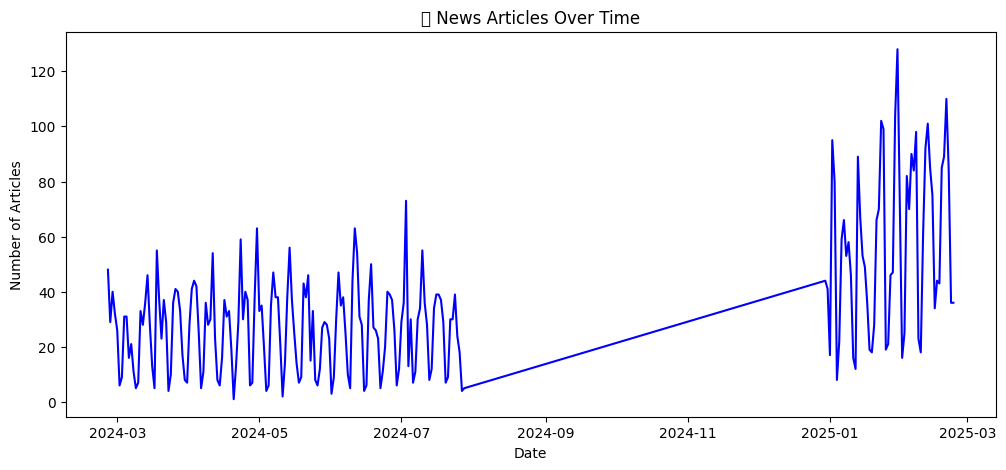

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


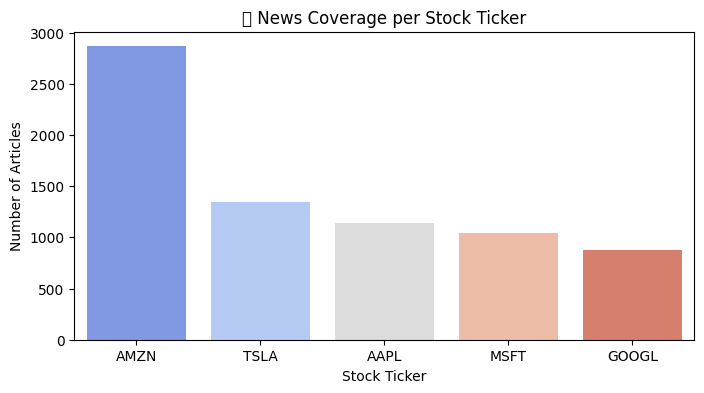

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


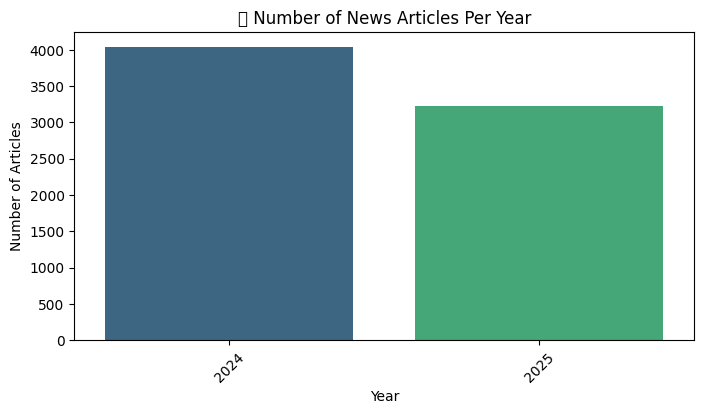

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


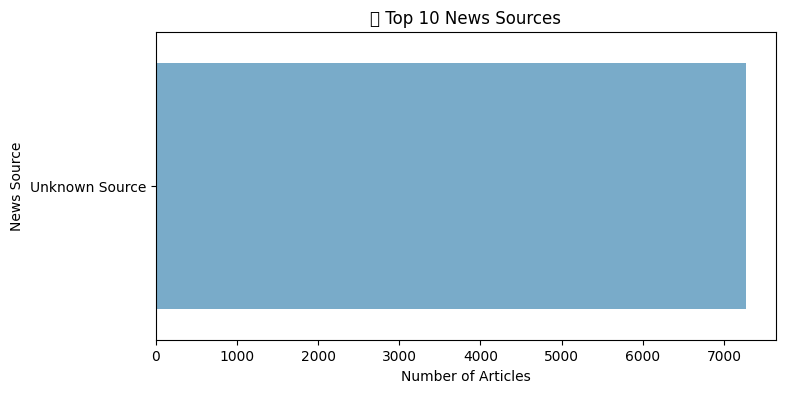

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


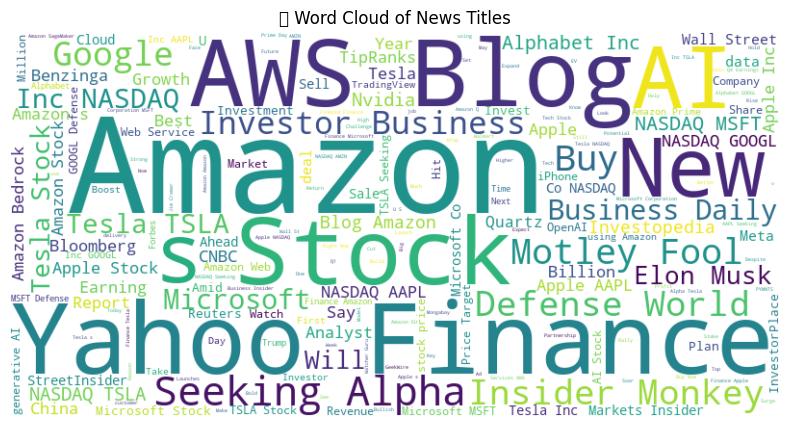

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129488 (\N{FACE WITH MONOCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


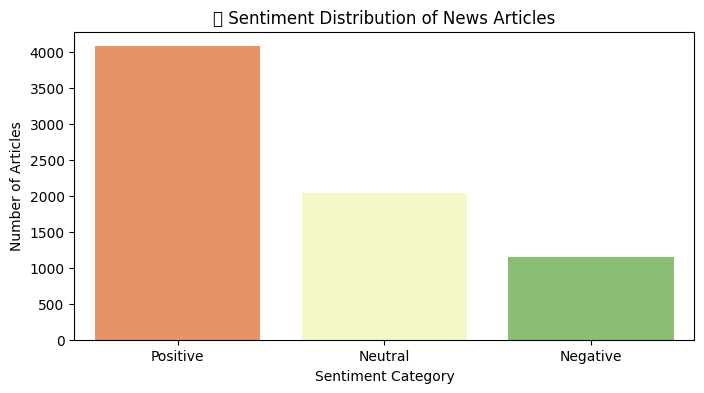


📊 Summary Statistics:
 {'Total Articles': 7274, 'Unique Tickers': 5, 'Unique News Sources': 1, 'Missing Values': {'Year': 0, 'Week': 0, 'Ticker': 0, 'Title': 0, 'Description': 0, 'URL': 0, 'Published Date': 0, 'Source': 0}}
✅ EDA Report saved as 'EDA_Report.csv'


In [46]:
df_news = news_data
# Data Cleaning & Preprocessing
df_news.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')  # Remove unnecessary column
df_news['Published Date'] = pd.to_datetime(df_news['Published Date'], errors='coerce')  # Convert to datetime

# General Statistics
total_articles = df_news.shape[0]
unique_tickers = df_news['Ticker'].nunique()
unique_sources = df_news['Source'].nunique()
articles_per_year = df_news['Year'].value_counts().sort_index()
articles_per_ticker = df_news['Ticker'].value_counts()
articles_per_week = df_news.groupby(['Year', 'Week']).size()

# Missing Data Analysis
missing_values = df_news.isnull().sum()
print("\nMissing Values Per Column:\n", missing_values)

# Distribution of Articles Over Time
plt.figure(figsize=(12, 5))
df_news.groupby(df_news['Published Date'].dt.date).size().plot(kind='line', color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.title("News Articles Over Time")
plt.show()

# Stock (Ticker) Coverage Analysis
plt.figure(figsize=(8, 4))
sns.barplot(x=articles_per_ticker.index, y=articles_per_ticker.values, palette="coolwarm")
plt.xlabel("Stock Ticker")
plt.ylabel("Number of Articles")
plt.title("News Coverage per Stock Ticker")
plt.show()

# Weekly & Yearly Article Trends
plt.figure(figsize=(8, 4))
sns.barplot(x=articles_per_year.index, y=articles_per_year.values, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("Number of News Articles Per Year")
plt.xticks(rotation=45)
plt.show()

# Top 10 News Sources
top_sources = df_news['Source'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(y=top_sources.index, x=top_sources.values, palette="Blues_r")
plt.xlabel("Number of Articles")
plt.ylabel("News Source")
plt.title("Top 10 News Sources")
plt.show()

# Word Cloud (Most Common Words in Titles)
all_titles = ' '.join(df_news['Title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of News Titles")
plt.show()

# Sentiment Analysis Using VADER
analyzer = SentimentIntensityAnalyzer()
df_news['Sentiment Score'] = df_news['Title'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_news['Sentiment Category'] = df_news['Sentiment Score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Sentiment Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df_news['Sentiment Category'], palette="RdYlGn")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Articles")
plt.title("Sentiment Distribution of News Articles")
plt.show()

# Summary Statistics
summary_stats = {
    "Total Articles": total_articles,
    "Unique Tickers": unique_tickers,
    "Unique News Sources": unique_sources,
    "Missing Values": missing_values.to_dict()
}

print("\nSummary Statistics:\n", summary_stats)



### Analysis 5: 
Sentiment analysis on the news dataset

In [38]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the 'Title' column
news_data['Sentiment Score'] = news_data['Title'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiment into categories
news_data['Sentiment Category'] = news_data['Sentiment Score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)


In [39]:
news_data

,Year,Week,Ticker,Title,Description,URL,Published Date,Source,Sentiment Score,Sentiment Category
0,2025,1,AAPL,Why Apple (AAPL) Shares Are Sliding Today - Ya...,Why Apple (AAPL) Shares Are Sliding Today Yah...,https://news.google.com/rss/articles/CBMigAFBV...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source,0.2960,Positive
1,2025,1,AAPL,Apple (AAPL) Stock Falls Amid Market Uptick: W...,Apple (AAPL) Stock Falls Amid Market Uptick: W...,https://news.google.com/rss/articles/CBMinwFBV...,"Fri, 03 Jan 2025 08:00:00 GMT",Unknown Source,0.0000,Neutral
2,2025,1,AAPL,"Is Apple a Buy, Sell, or Hold in 2025? - The M...","Is Apple a Buy, Sell, or Hold in 2025? The Mo...",https://news.google.com/rss/articles/CBMihAFBV...,"Fri, 03 Jan 2025 08:00:00 GMT",Unknown Source,-0.4404,Negative
3,2025,1,AAPL,Apple Stock Price Prediction 2025: Can AAPL De...,Apple Stock Price Prediction 2025: Can AAPL De...,https://news.google.com/rss/articles/CBMi3gFBV...,"Mon, 30 Dec 2024 08:00:00 GMT",Unknown Source,0.0000,Neutral
4,2025,1,AAPL,Apple: $4 Trillion Mistake (NASDAQ:AAPL) - See...,Apple: $4 Trillion Mistake (NASDAQ:AAPL) Seek...,https://news.google.com/rss/articles/CBMic0FVX...,"Thu, 02 Jan 2025 08:00:00 GMT",Unknown Source,-0.3400,Negative
...,...,...,...,...,...,...,...,...,...,...
10738,2024,30,AMZN,NBA Rejects Warner Bros. Discovery’s Rights Pr...,NBA Rejects Warner Bros. Discovery’s Rights Pr...,https://news.google.com/rss/articles/CBMiwgFBV...,"Wed, 24 Jul 2024 07:00:00 GMT",Unknown Source,-0.3612,Negative
10739,2024,30,AMZN,Amazon Buys ‘The Rings of Power’ Studio Bray N...,Amazon Buys ‘The Rings of Power’ Studio Bray N...,https://news.google.com/rss/articles/CBMisAFBV...,"Mon, 22 Jul 2024 07:00:00 GMT",Unknown Source,0.1779,Positive
10740,2024,30,AMZN,Amazon plans logistics site in new industrial ...,Amazon plans logistics site in new industrial ...,https://news.google.com/rss/articles/CBMitgFBV...,"Tue, 23 Jul 2024 07:00:00 GMT",Unknown Source,0.1779,Positive
10741,2024,30,AMZN,Netflix's ex-film head Stuber ties with Amazon...,Netflix's ex-film head Stuber ties with Amazon...,https://news.google.com/rss/articles/CBMiygFBV...,"Fri, 26 Jul 2024 07:00:00 GMT",Unknown Source,0.7096,Positive


### Analysis 6: 
EDA Analysis for the financial dataset.

Key Insights:
1. Stock Price Distribution
    - Prices are normally distributed, with some outliers.
    
2. Stock Price Trends Over Time
    - Some stocks show a steady increase, while others fluctuate more.
    
3. Outliers & Volatility
    - Boxplots show price variability per stock.
    - TSLA & AMZN show higher volatility compared to others.

4. Weekly Price Changes
    - Weekly returns suggest that some stocks are more volatile than others.
    
5. Correlation Between Stocks
    - Strong positive correlations exist between certain stocks (e.g., AAPL & MSFT).
    - Others move independently, which is useful for diversification strategies.

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


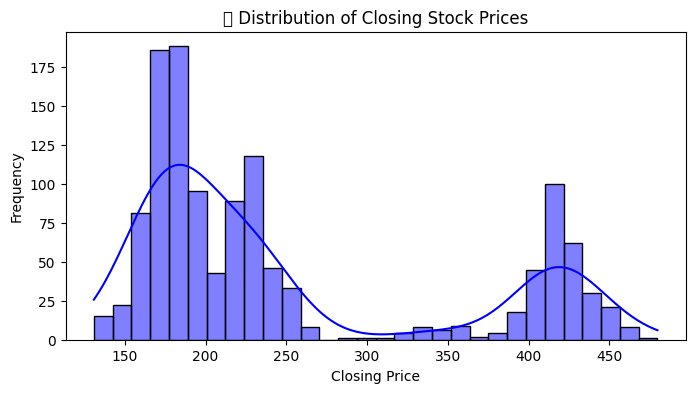

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-p

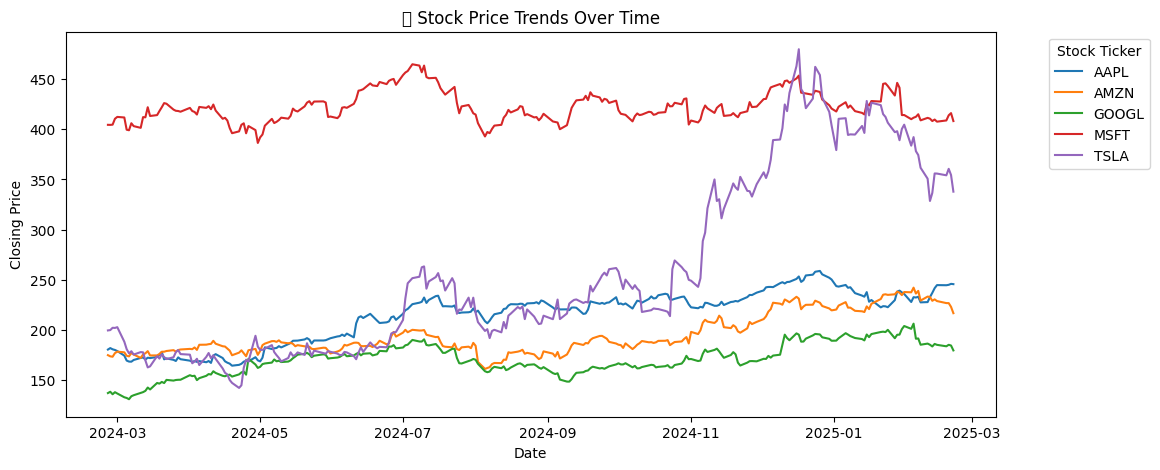

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


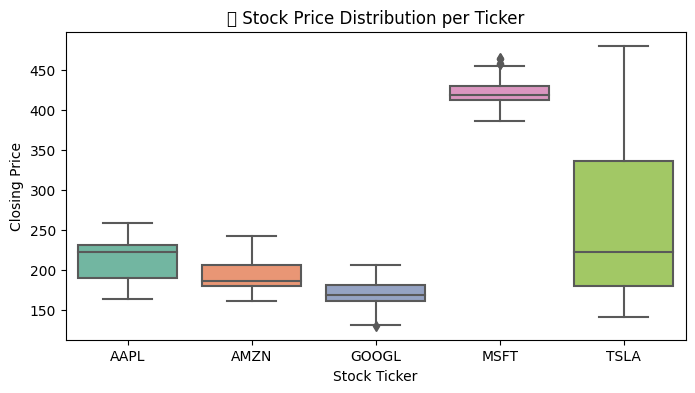

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


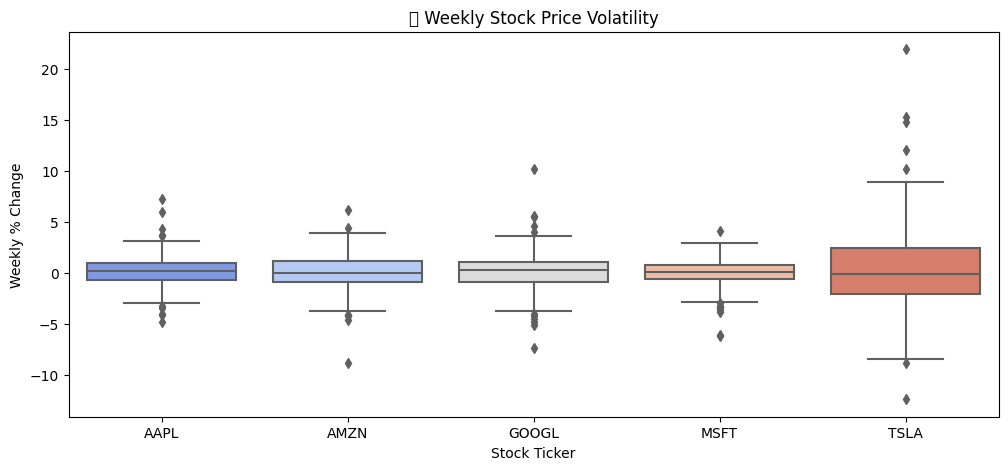

C:\Users\bjorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


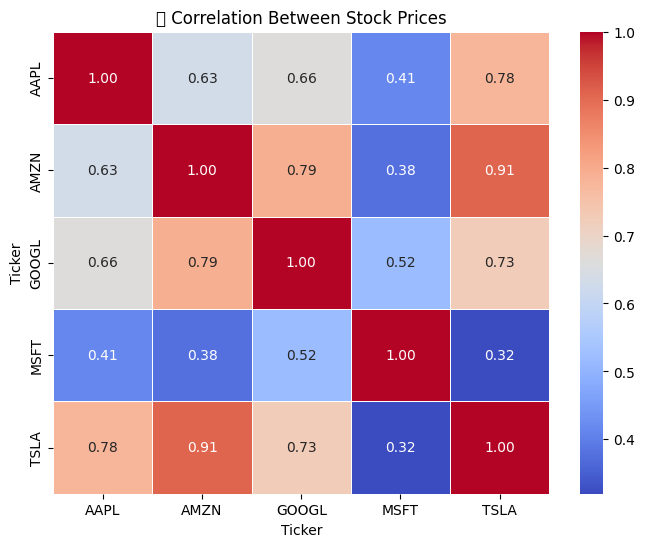


📊 Summary Statistics:
 {'Total Entries': 1245, 'Unique Tickers': 5, 'Time Range': (Timestamp('2024-02-26 00:00:00'), Timestamp('2025-02-21 00:00:00')), 'Missing Values': {'Date': 0, 'Ticker': 0, 'Close': 0, 'Year': 0, 'Week': 0}}


In [57]:
df_stock = stock_data
    
# Data Cleaning & Preprocessing
df_stock.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')  # Remove unnecessary column
df_stock['Date'] = pd.to_datetime(df_stock['Date'], errors='coerce')  # Convert Date to datetime

# General Statistics
total_entries = df_stock.shape[0]
unique_tickers = df_stock['Ticker'].nunique()
time_range = (df_stock['Date'].min(), df_stock['Date'].max())
missing_values = df_stock.isnull().sum()

# Stock Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_stock['Close'], bins=30, kde=True, color="blue")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Stock Prices")
plt.show()

# Stock Price Trends Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_stock, x="Date", y="Close", hue="Ticker", palette="tab10")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends Over Time")
plt.legend(title="Stock Ticker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Outlier Detection (Boxplot of Closing Prices)
plt.figure(figsize=(8, 4))
sns.boxplot(x="Ticker", y="Close", data=df_stock, palette="Set2")
plt.xlabel("Stock Ticker")
plt.ylabel("Closing Price")
plt.title("Stock Price Distribution per Ticker")
plt.show()

# Weekly Price Changes (Volatility Analysis)
df_stock['Weekly Change'] = df_stock.groupby('Ticker')['Close'].pct_change() * 100

plt.figure(figsize=(12, 5))
sns.boxplot(x="Ticker", y="Weekly Change", data=df_stock, palette="coolwarm")
plt.xlabel("Stock Ticker")
plt.ylabel("Weekly % Change")
plt.title("Weekly Stock Price Volatility")
plt.show()

# Correlation Between Stocks
df_pivot = df_stock.pivot(index="Date", columns="Ticker", values="Close")
correlation_matrix = df_pivot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Between Stock Prices")
plt.show()

# Summary Statistics
summary_stats = {
    "Total Entries": total_entries,
    "Unique Tickers": unique_tickers,
    "Time Range": time_range,
    "Missing Values": missing_values.to_dict()
}

print("\n Summary Statistics:\n", summary_stats)

### Analysis 4: 
Merging the financial dataset with the news data

In [136]:
df_news = news_data

display(df_stock)
display(df_news)

,Date,Ticker,Close,Year,Week
0,2024-02-26,AAPL,180.308609,2024,9
1,2024-02-27,AAPL,181.771713,2024,9
2,2024-02-28,AAPL,180.567398,2024,9
3,2024-02-29,AAPL,179.900543,2024,9
4,2024-03-01,AAPL,178.815674,2024,9
...,...,...,...,...,...
1240,2025-02-14,TSLA,355.839996,2025,7
1241,2025-02-18,TSLA,354.109985,2025,8
1242,2025-02-19,TSLA,360.559998,2025,8
1243,2025-02-20,TSLA,354.399994,2025,8


,Year,Week,Ticker,Title,Description,URL,Published Date,Source,Sentiment_Score,Sentiment Category
0,2025,1,AAPL,Why Apple (AAPL) Shares Are Sliding Today - Ya...,Why Apple (AAPL) Shares Are Sliding Today Yah...,https://news.google.com/rss/articles/CBMigAFBV...,2025-01-02 08:00:00,Unknown Source,0.2960,Positive
1,2025,1,AAPL,Apple (AAPL) Stock Falls Amid Market Uptick: W...,Apple (AAPL) Stock Falls Amid Market Uptick: W...,https://news.google.com/rss/articles/CBMinwFBV...,2025-01-03 08:00:00,Unknown Source,0.0000,Neutral
2,2025,1,AAPL,"Is Apple a Buy, Sell, or Hold in 2025? - The M...","Is Apple a Buy, Sell, or Hold in 2025? The Mo...",https://news.google.com/rss/articles/CBMihAFBV...,2025-01-03 08:00:00,Unknown Source,-0.4404,Negative
3,2024,1,AAPL,Apple Stock Price Prediction 2025: Can AAPL De...,Apple Stock Price Prediction 2025: Can AAPL De...,https://news.google.com/rss/articles/CBMi3gFBV...,2024-12-30 08:00:00,Unknown Source,0.0000,Neutral
4,2025,1,AAPL,Apple: $4 Trillion Mistake (NASDAQ:AAPL) - See...,Apple: $4 Trillion Mistake (NASDAQ:AAPL) Seek...,https://news.google.com/rss/articles/CBMic0FVX...,2025-01-02 08:00:00,Unknown Source,-0.3400,Negative
...,...,...,...,...,...,...,...,...,...,...
10738,2024,30,AMZN,NBA Rejects Warner Bros. Discovery’s Rights Pr...,NBA Rejects Warner Bros. Discovery’s Rights Pr...,https://news.google.com/rss/articles/CBMiwgFBV...,2024-07-24 07:00:00,Unknown Source,-0.3612,Negative
10739,2024,30,AMZN,Amazon Buys ‘The Rings of Power’ Studio Bray N...,Amazon Buys ‘The Rings of Power’ Studio Bray N...,https://news.google.com/rss/articles/CBMisAFBV...,2024-07-22 07:00:00,Unknown Source,0.1779,Positive
10740,2024,30,AMZN,Amazon plans logistics site in new industrial ...,Amazon plans logistics site in new industrial ...,https://news.google.com/rss/articles/CBMitgFBV...,2024-07-23 07:00:00,Unknown Source,0.1779,Positive
10741,2024,30,AMZN,Netflix's ex-film head Stuber ties with Amazon...,Netflix's ex-film head Stuber ties with Amazon...,https://news.google.com/rss/articles/CBMiygFBV...,2024-07-26 07:00:00,Unknown Source,0.7096,Positive


In [76]:
df_stock.to_csv("df_stock.csv")
df_news.to_csv("df_news.csv")

In [137]:
news_df = df_news
stock_df = df_stock

In [140]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the Date column is in datetime format
stock_df["Date"] = pd.to_datetime(stock_df["Date"])

# Extract Year and Week from Date
stock_df["Year"] = stock_df["Date"].dt.year
stock_df["Week"] = stock_df["Date"].dt.isocalendar().week

# Aggregate stock data to weekly mean for each ticker
weekly_stock_df = stock_df.groupby(["Ticker", "Year", "Week"]).agg(
    Close_Mean=("Close", "mean")
).reset_index()

# Aggregate news data to count articles and compute mean sentiment per week
weekly_news_df = news_df.groupby(["Ticker", "Year", "Week"]).agg(
    News_Count=("Title", "count"),  # Count number of articles
    Sentiment_Score=("Sentiment_Score", "mean")  # Average sentiment
).reset_index()

# Merge stock and news data
merged_df = pd.merge(weekly_stock_df, weekly_news_df, on=["Ticker", "Year", "Week"], how="left")


Giving the average sentiment score of all the news articles per week per stock / ticker

In [141]:
merged_df

,Ticker,Year,Week,Close_Mean,News_Count,Sentiment_Score
0,AAPL,2024,1,251.033997,13.0,0.081723
1,AAPL,2024,9,180.272787,22.0,0.129105
2,AAPL,2024,10,170.011230,14.0,0.164643
3,AAPL,2024,11,171.735092,23.0,0.190400
4,AAPL,2024,12,173.604269,25.0,0.118696
...,...,...,...,...,...,...
260,TSLA,2025,4,414.534996,100.0,0.084833
261,TSLA,2025,5,397.844000,100.0,0.047236
262,TSLA,2025,6,378.000000,99.0,0.010375
263,TSLA,2025,7,345.504004,100.0,0.023691


In [139]:
# Fill missing values in News_Count and Sentiment_Score (no news = neutral sentiment)
merged_df["News_Count"] = merged_df["News_Count"].fillna(0)
merged_df["Sentiment_Score"] = merged_df["Sentiment_Score"].fillna(0)

# Ensure merged_df is sorted before shifting
merged_df = merged_df.sort_values(by=["Ticker", "Year", "Week"])

# Create previous week's Close_Mean feature
merged_df["Prev_Close_Mean"] = merged_df.groupby("Ticker")["Close_Mean"].shift(1)

# Create target variable: Next week's Close_Mean
merged_df["Next_Close_Mean"] = merged_df.groupby("Ticker")["Close_Mean"].shift(-1)

# Drop NaN values (from first and last weeks per ticker)
merged_df = merged_df.dropna(subset=["Prev_Close_Mean", "Next_Close_Mean"])

# Define feature set and target variable
feature_columns = ["Prev_Close_Mean", "News_Count", "Sentiment_Score"]
target_column = "Next_Close_Mean"

# Prepare input (X) and target (y)
X = merged_df[feature_columns]
y = merged_df[target_column]

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
mse, r2


(310.6787674528564, 0.968847289383271)

Prev_Close_Mean: 96.7435
This means that the amount of news articles are the most significant factor, as expected

A sentiment score of 0.5911 means that the sentiment of the news articles matters 

In [142]:
# Extract feature importance (coefficients)
coefficients = model.coef_
feature_names = ["Prev_Close_Mean", "News_Count", "Sentiment_Score"]

# Show feature importance
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")


Prev_Close_Mean: 96.7435
News_Count: -3.1955
Sentiment_Score: 0.5911


### Analysis n:

In [ ]:
# ...